In [1]:
import dynamics_analysis as da
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
import os.path

%load_ext autoreload
%autoreload 2

In [30]:
#path_ME_data = "../../READOUT_MASTER_EQUATION/data/PPLT_tmax799_Nq2_Nc4_amp0.0020_kappa0.0100_wq5.0000_anh15915494.1500_wc5.5000_wd5.5000_ms1e-03_dimexp70_qb[1]_00_TRSM0.d"
#pplt_me_ad002=np.loadtxt( path_ME_data )

dyns = {}
path = '../../data_fortran/MPOL_DCT_100/data/'
paramchar = "nl2_wc5.500_n2_20_E-0.99E+02_dtadd4.00_4.00_8_ar0.0_wq5.000_g0.050_gam0.016000_nm250_mr0.00_p0.5E-05_bw1.500_bc5.250_wd5.500_ad{ad:.3f}_anh159.155_dt0.0100_errl0.1E-03_lsfe14_qb1_cv0.0_tmax80"
for x in range(20):
    paramchar_x = paramchar.format(ad=x*0.001)
    if os.path.exists(path+"PHOTONS_"+paramchar_x+".d"):
        dyns[x] = da.dynamics(2,path, paramchar_x)
        
sorted_keys =  sorted(dyns.keys())

## Mean number of photons versus time

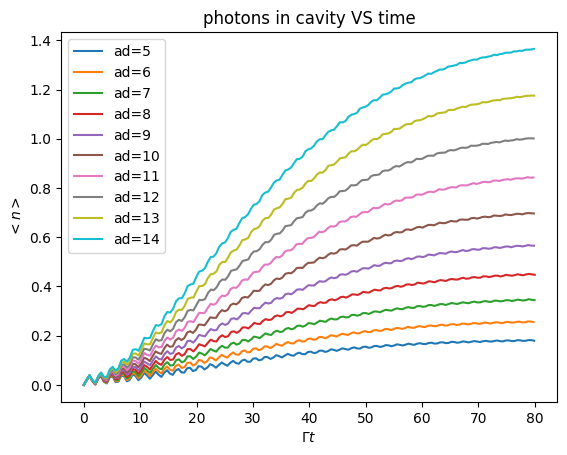

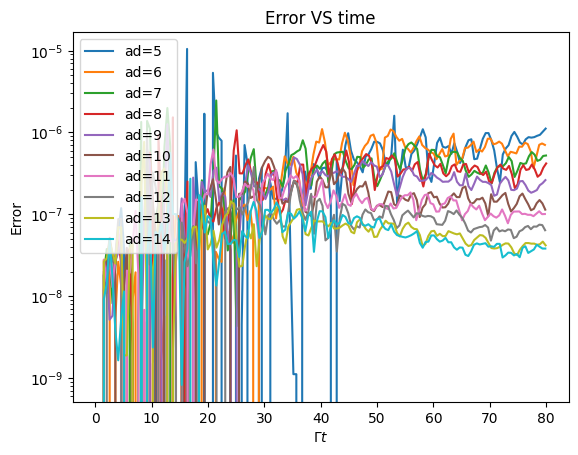

In [32]:
#-- plotting the mean photon number in the cavity
for ad in sorted_keys:
    plt.plot( dyns[ad].times, dyns[ad].nk[:,0], label='ad='+str(ad)  )
plt.ylabel( "$<n>$" )
plt.xlabel( "$\Gamma t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.show()

#-- plotting the error in the qubit state with respect to the schrodinger equaiton
for ad in sorted_keys:
    plt.plot( dyns[ad].times, dyns[ad].error, label='ad='+str(ad)  )
plt.ylabel( "Error" )
plt.xlabel( "$\Gamma t$" )
plt.title( "Error VS time"  )
plt.yscale( 'log' )
plt.legend()
plt.show()

## Renyi entropy between qubit and cavity

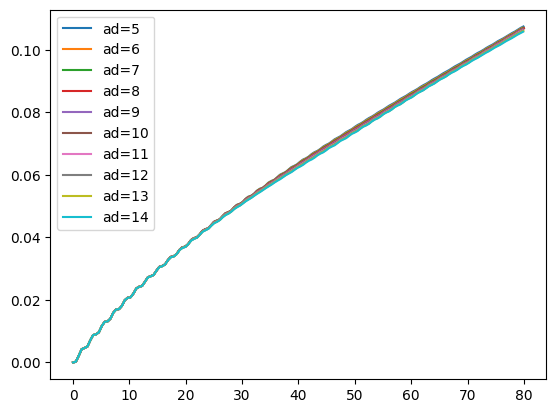

In [35]:
for ad in sorted_keys:
    plt.plot( dyns[ad].times, dyns[ad].entropy, label='ad='+str(ad)  )
plt.legend()

In [38]:
dyns

{5: <dynamics_analysis.dynamics.dynamics at 0x14e624fa0>,
 6: <dynamics_analysis.dynamics.dynamics at 0x14e624130>,
 7: <dynamics_analysis.dynamics.dynamics at 0x14e624220>,
 8: <dynamics_analysis.dynamics.dynamics at 0x14e624f40>,
 9: <dynamics_analysis.dynamics.dynamics at 0x14e624880>,
 10: <dynamics_analysis.dynamics.dynamics at 0x14e6249a0>,
 11: <dynamics_analysis.dynamics.dynamics at 0x14e624b80>,
 12: <dynamics_analysis.dynamics.dynamics at 0x14e624790>,
 13: <dynamics_analysis.dynamics.dynamics at 0x14e5c0f70>,
 14: <dynamics_analysis.dynamics.dynamics at 0x14e5c0e20>}

In [36]:
entropy = {}
nk_dict = {}
for ad in dyns:
    nk_dict[ad] = dyns[ad].nk[-1,0]

for ad in dyns:
    entropy[ ad ] = dyns[ad].final_state.renyi_entropy(0, 30)
    print('photons=', nk_dict[ad], 'entropy[ad]',entropy[ad])

photons= 0.17922342811847 entropy[ad] 0.10753156041206527
photons= 0.255312949233958 entropy[ad] 0.10722365904380679
photons= 0.344204428293286 entropy[ad] 0.10703492500143713
photons= 0.447339991057177 entropy[ad] 0.10688131555898531
photons= 0.565399018655659 entropy[ad] 0.1067410186238073
photons= 0.696262277247475 entropy[ad] 0.10660203987788454
photons= 0.842640121381449 entropy[ad] 0.10645662334174456
photons= 1.001007540327583 entropy[ad] 0.10628698516315777
photons= 1.175120058814654 entropy[ad] 0.10610498802322475
photons= 1.364863801887285 entropy[ad] 0.10588272916273687


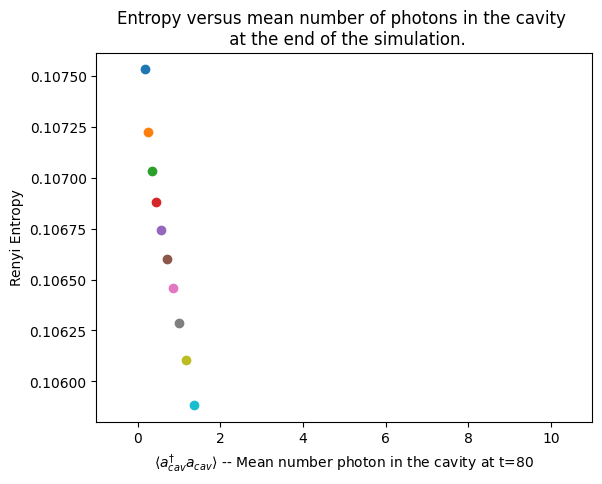

In [37]:
for ad in dyns:
    plt.scatter( nk_dict[ad], entropy[ad] )

plt.xlim( -1,11 )
plt.title( 'Entropy versus mean number of photons in the cavity \n at the end of the simulation.' )
plt.ylabel( 'Renyi Entropy' )
plt.xlabel( r'$\langle a^\dag_{cav}a_{cav}\rangle$ -- Mean number photon in the cavity at t=80' )
plt.show()

In [32]:
dyns

{37: <dynamics_analysis.dynamics.dynamics at 0x109b17160>,
 2: <dynamics_analysis.dynamics.dynamics at 0x1329ca190>,
 26: <dynamics_analysis.dynamics.dynamics at 0x14288b970>,
 22: <dynamics_analysis.dynamics.dynamics at 0x1329ca1f0>,
 27: <dynamics_analysis.dynamics.dynamics at 0x1329ca2b0>,
 28: <dynamics_analysis.dynamics.dynamics at 0x132b797f0>,
 29: <dynamics_analysis.dynamics.dynamics at 0x127f02a30>,
 7: <dynamics_analysis.dynamics.dynamics at 0x1329ca460>,
 8: <dynamics_analysis.dynamics.dynamics at 0x127f02880>,
 9: <dynamics_analysis.dynamics.dynamics at 0x127f02c70>,
 10: <dynamics_analysis.dynamics.dynamics at 0x14285c580>}